**Fuzzy Logic**

In [ ]:
'''This code takes:

A temperature input (like “Low Temp”)

A humidity input (like “Dry”)

Then it decides:

What level of cooling should be applied: Low, Medium, or High.'''

import numpy as np

# Fuzzy Relations for Temperature to Humidity (R(X -> Y))
R = {
    "Low Temp": [0.8, 0.5, 0.3],   # Dry, Normal, Humid
    "Medium Temp": [0.6, 0.7, 0.4],
    "High Temp": [0.3, 0.6, 0.9]
}

# Fuzzy Relations for Humidity to Cooling (S(Y -> Z))
S = {
    "Dry": [0.7, 0.4, 0.3],        # Low Cooling, Medium Cooling, High Cooling
    "Normal": [0.5, 0.6, 0.4],
    "Humid": [0.2, 0.5, 0.8]
}

# Input values
temperature_input = "Low Temp"  # Low Temperature
humidity_input = "Dry"         # Dry Humidity

# Extract the relevant membership values for the given inputs
mu_R = R[temperature_input]  # Membership values for Low Temp
mu_S = S[humidity_input]     # Membership values for Dry Humidity

# Apply Min-Max Composition
def min_max_composition(mu_R, mu_S):
    # Initialize the result for the composed relation (Low Cooling, Medium Cooling, High Cooling)
    result = []

    # Perform Min-Max Composition for each cooling action (Low, Medium, High Cooling)
    for z in range(3):  # We have 3 cooling actions
        # Take the minimum of the corresponding values from R and S
        if z == 0:
            min_value = min(mu_R[0], mu_S[0])
        elif z == 1:
            min_value = min(mu_R[1], mu_S[1])
        else:
            min_value = min(mu_R[2], mu_S[2])

        result.append(min_value)

    return result

# Calculate the final result for Low Temp and Dry Humidity
composed_result = min_max_composition(mu_R, mu_S)

# Find the maximum membership value to determine the cooling action
cooling_action = ["Low Cooling", "Medium Cooling", "High Cooling"]
max_membership_value = max(composed_result)
action_index = composed_result.index(max_membership_value)

# Output the results
print(f"Input: Temperature = {temperature_input}, Humidity = {humidity_input}")
print(f"Membership values for Cooling Actions: {composed_result}")
print(f"The system selects: {cooling_action[action_index]} with a membership value of {max_membership_value:.2f}")


Input: Temperature = Low Temp, Humidity = Dry
Membership values for Cooling Actions: [0.7, 0.4, 0.3]
The system selects: Low Cooling with a membership value of 0.70


In [ ]:
# Defuzzification, Lambda cut method Define the fuzzy set as a dictionary where the keys are the elements and the values are their membership values
fuzzy_set = {'x': 4.5, 'y': 3.5, 'z':4.33}

# Define the lambda value for the cut
lambda_value = 4

# Perform the lambda cut
def lambda_cut(fuzzy_set, lambda_value):
    # Create a list to store the elements that satisfy the lambda-cut condition
    cut_set = []

    # Iterate through the fuzzy set
    for element, membership_value in fuzzy_set.items():
        if membership_value >= lambda_value:
            cut_set.append(element)

    return cut_set

# Get the resulting crisp set (elements with membership >= lambda_value)
result = lambda_cut(fuzzy_set, lambda_value)

# Output the result
print(f"Elements in the fuzzy set with membership >= {lambda_value}: {result}")


Elements in the fuzzy set with membership >= 4: ['x', 'z']


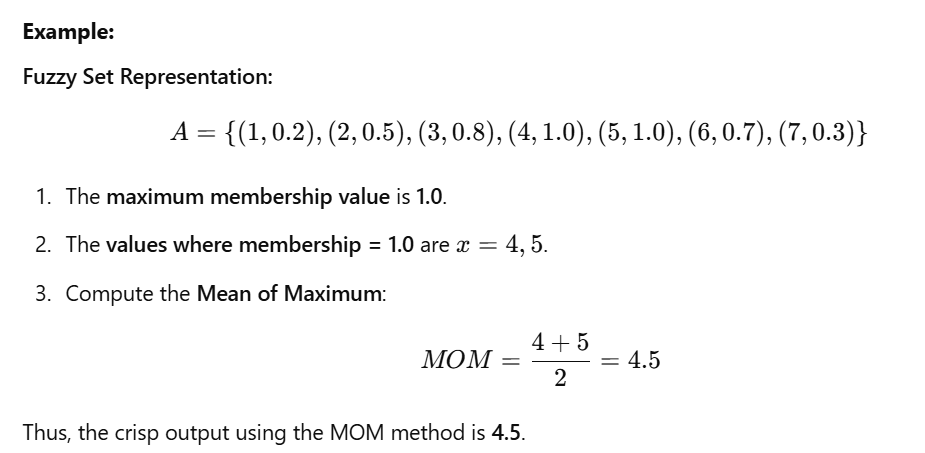

In [ ]:
#Mean of maximum method
def mean_of_maximum(fuzzy_set):
    # Find the maximum membership value
    max_membership = max(fuzzy_set.values())

    # Get all x values where membership is maximum
    max_x_values = [x for x, mu in fuzzy_set.items() if mu == max_membership]

    # Compute the mean of these x values
    return sum(max_x_values) / len(max_x_values)

# Example fuzzy set (dictionary format: {x: membership_value})
fuzzy_set = {1: 0.2, 2: 0.5, 3: 0.8, 4: 1.0, 5: 1.0, 6: 0.7, 7: 0.3}

# Compute MOM defuzzification
result = mean_of_maximum(fuzzy_set)

# Output the result
print(f"Mean of Maximum (MOM) defuzzified value: {result}")


Mean of Maximum (MOM) defuzzified value: 4.5


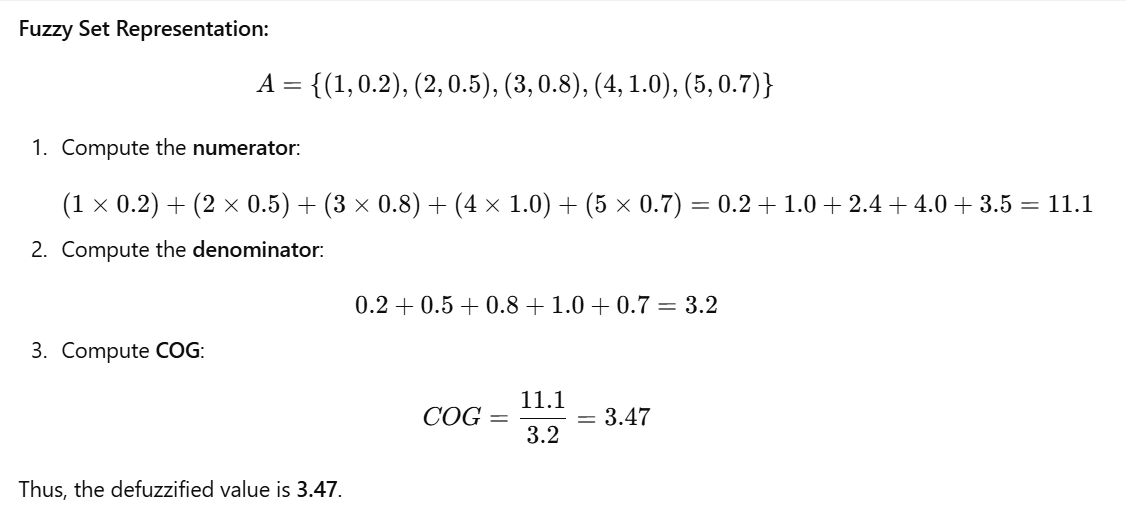

In [ ]:
def center_of_gravity(fuzzy_set):
    # Compute the numerator (sum of x * μ(x))
    numerator = sum(x * mu for x, mu in fuzzy_set.items())

    # Compute the denominator (sum of μ(x))
    denominator = sum(fuzzy_set.values())

    # Avoid division by zero
    return numerator / denominator if denominator != 0 else 0

# Example fuzzy set (dictionary format: {x: membership_value})
fuzzy_set = {1: 0.2, 2: 0.5, 3: 0.8, 4: 1.0, 5: 0.7}

# Compute COG defuzzification
result = center_of_gravity(fuzzy_set)

# Output the result
print(f"Center of Gravity (COG) defuzzified value: {result}")


Center of Gravity (COG) defuzzified value: 3.4687500000000004


In [2]:
#Fuzzy Controller
def fuzzy_controller(temp):
    if temp < 20:
        return "HEAT"
    elif 20 <= temp <= 25:
        return "MAINTAIN"
    else:
        return "COOL"

**Genetic Algorithm**

In [ ]:
#3
import random

def fitness(x):
    return x**2

population = [random.randint(0, 31) for _ in range(4)]

for _ in range(5):  # generations
    fitness_vals = [fitness(x) for x in population]
    parents = sorted(zip(population, fitness_vals), key=lambda x: x[1], reverse=True)[:2]
    offspring = [random.randint(0, 31) for _ in range(2)]
    population = [p[0] for p in parents] + offspring

print("Final Population:", population)


Final Population: [30, 29, 25, 25]


In [3]:
import random

# Step 1: Define fitness function (maximize x^2)
def fitness(x):
    return x ** 2

# Step 2: Crossover function (1-point crossover on 5-bit binary)
def crossover(parent1, parent2):
    point = random.randint(1, 4)  # pick a crossover point (not at ends)
    p1_bin = format(parent1, '05b')  # convert to 5-bit binary
    p2_bin = format(parent2, '05b')

    # crossover
    child1_bin = p1_bin[:point] + p2_bin[point:]
    child2_bin = p2_bin[:point] + p1_bin[point:]

    return int(child1_bin, 2), int(child2_bin, 2)  # convert back to int

# Step 3: Mutation function (flip a random bit)
def mutate(individual):
    bin_str = list(format(individual, '05b'))  # 5-bit binary
    index = random.randint(0, 4)               # choose a bit to flip
    bin_str[index] = '1' if bin_str[index] == '0' else '0'
    return int(''.join(bin_str), 2)            # convert back to int

# Step 4: Initialize population
population = [random.randint(0, 31) for _ in range(4)]

# Step 5: Evolve for 5 generations
for generation in range(5):
    print(f"Generation {generation + 1}: {population}")

    # Calculate fitness
    fitness_values = [fitness(ind) for ind in population]

    # Select top 2 parents
    paired = list(zip(population, fitness_values))
    sorted_pairs = sorted(paired, key=lambda p: p[1], reverse=True)
    parent1, parent2 = sorted_pairs[0][0], sorted_pairs[1][0]

    # Crossover to generate 2 children
    child1, child2 = crossover(parent1, parent2)

    # Mutate children
    child1 = mutate(child1)
    child2 = mutate(child2)

    # New population = 2 parents + 2 children
    population = [parent1, parent2, child1, child2]

# Final output
print("Final Population:", population)

Generation 1: [21, 17, 19, 8]
Generation 2: [21, 19, 17, 20]
Generation 3: [21, 20, 21, 17]
Generation 4: [21, 21, 20, 17]
Generation 5: [21, 21, 20, 29]
Final Population: [29, 21, 31, 20]


**Merge Sort**

In [4]:
def merge_sort(arr):
    # Base case: If the array has 0 or 1 element, it's already sorted
    if len(arr) <= 1:
        return arr

    # Step 1: Split the array into two halves
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])

    # Step 2: Merge the sorted halves
    return merge(left_half, right_half)

def merge(left, right):
    result = []
    i = j = 0

    # Compare and merge the elements from left and right
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    # Add remaining elements (if any)
    result.extend(left[i:])
    result.extend(right[j:])

    return result

# Example usage
arr = [38, 27, 43, 3, 9, 82, 10]
sorted_arr = merge_sort(arr)
print("Sorted Array:", sorted_arr)


Sorted Array: [3, 9, 10, 27, 38, 43, 82]


**Ant Colony**

In [5]:
#5
import numpy as np

num_cities = 5
pheromone = np.ones((num_cities, num_cities))
distance = np.random.randint(1, 100, (num_cities, num_cities)).astype(float)
np.fill_diagonal(distance, np.inf)

for iteration in range(10):
    for ant in range(5):
        path = [0]
        while len(path) < num_cities:
            current = path[-1]
            probs = pheromone[current] / distance[current]
            probs[list(path)] = 0
            next_city = np.argmax(probs)
            path.append(next_city)
        # Update pheromone
        for i in range(len(path)-1):
            pheromone[path[i]][path[i+1]] += 1.0 / distance[path[i]][path[i+1]]

print("Final pheromone matrix:\n", pheromone)


Final pheromone matrix:
 [[ 1.          1.          1.          2.19047619  1.        ]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          5.16666667  1.          1.          1.        ]
 [ 1.          1.          1.          1.          2.08695652]
 [ 1.          1.         51.          1.          1.        ]]


**Particle Swarm Optimization**

In [6]:
#6
import numpy as np

def f(x):
    return x**2 + 4*x + 4

pos = np.random.uniform(-10, 10, 10)
vel = np.zeros_like(pos)
pbest = pos.copy()
gbest = pos[np.argmin(f(pos))]

for _ in range(50):
    r1, r2 = np.random.rand(), np.random.rand()
    vel = 0.5*vel + 0.8*r1*(pbest - pos) + 0.9*r2*(gbest - pos)
    pos += vel
    pbest = np.where(f(pos) < f(pbest), pos, pbest)
    gbest = pbest[np.argmin(f(pbest))]

print("Best solution found:", gbest)


Best solution found: -2.0000000189255265


**Grey Wolf**

In [7]:
import numpy as np

def obj(x):
    return x**2 + 5*np.sin(x)

wolves = np.random.uniform(-10, 10, 5)
alpha = min(wolves, key=obj)

for _ in range(20):
    a = 2 - _ * (2/20)
    for i in range(len(wolves)):
        r1, r2 = np.random.rand(), np.random.rand()
        A = 2 * a * r1 - a
        C = 2 * r2
        D = abs(C * alpha - wolves[i])
        wolves[i] = alpha - A * D
    alpha = min(wolves, key=obj)

print("Best solution:", alpha)

Best solution: -1.1162988599117771


**Crisp Partitions**

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  True Class  Cluster  
0     setosa        0  
1     setosa        0  
2     setosa        0  
3     setosa        0  
4     setosa        0  

Cluster distribution:
 True Class  Cluster
setosa      0          50
versicolor  1          39
virginica   2          36
            1          14
versicolor  2          11
Name: count, dtype: int64


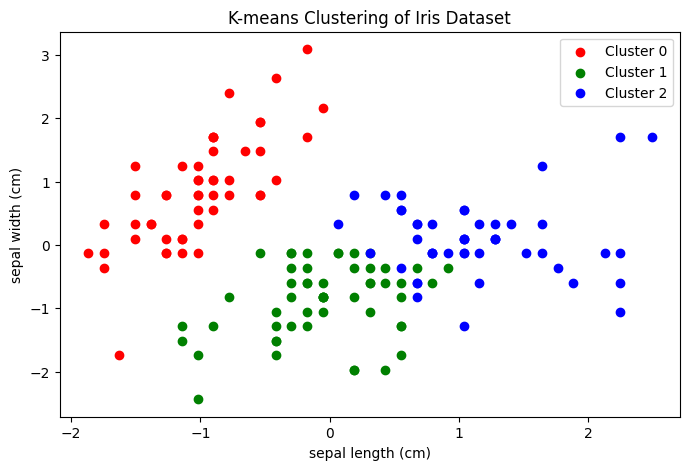

In [8]:
# 8. Crisp partitions
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
kmeans = KMeans(n_clusters=3, n_init=10)
labels = kmeans.fit_predict(X)

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['True Class'] = [iris.target_names[i] for i in iris.target]
df['Cluster'] = labels

print(df.head())
print("\nCluster distribution:\n", df[['True Class', 'Cluster']].value_counts())

plt.figure(figsize=(8, 5))
for i, color in enumerate(['red', 'green', 'blue']):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=color, label=f'Cluster {i}')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()

**Perceptron- Hebbs or Delta's**

In [10]:
import numpy as np

# AND gate dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([-1, -1, -1, 1])  # AND logic (-1 for 0, 1 for 1)

# Add bias term
Xb = np.hstack((X, np.ones((4,1))))

# Hebb's learning rule: w += x * y
w = np.zeros(3)
for i in range(len(Xb)):
    w += Xb[i] * y[i]

# Test
print("Hebb's Rule Weights:", w)
for i in range(len(Xb)):
    out = np.sign(np.dot(Xb[i], w))
    print(f"Input: {X[i]}, Output: {out}")


Hebb's Rule Weights: [ 0.  0. -2.]
Input: [0 0], Output: -1.0
Input: [0 1], Output: -1.0
Input: [1 0], Output: -1.0
Input: [1 1], Output: -1.0


In [11]:
import numpy as np

# AND gate dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])  # Output for AND

# Add bias term
Xb = np.hstack((X, np.ones((4,1))))

# Delta rule training
w = np.zeros(3)
lr = 0.1
for epoch in range(10):
    for i in range(len(Xb)):
        out = np.dot(Xb[i], w)
        error = y[i] - out
        w += lr * error * Xb[i]

# Test
print("\nDelta Rule Weights:", w)
for i in range(len(Xb)):
    out = np.dot(Xb[i], w)
    print(f"Input: {X[i]}, Output: {round(out)}")


Delta Rule Weights: [ 0.34975884  0.3302731  -0.00561267]
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


**Ensemble Network Programming**

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier()

ensemble = VotingClassifier(estimators=[
    ('lr', clf1), ('nb', clf2), ('dt', clf3)],
    voting='hard')

ensemble.fit(X_train, y_train)
print("Accuracy:", ensemble.score(X_test, y_test))

Accuracy: 0.9777777777777777
